In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#%matplotlib notebook            # Intractive plots
%matplotlib inline

# Importing and transforming the data

In [2]:
filename_1 = 'ex1data1.txt'      # Dataset for simple linear regression
filename_2 = 'ex1data2.txt'      # Dataset for multiple linear regression

In [3]:
# Load the data as numpy array
data_1 = np.loadtxt(filename_1, delimiter = ',')     # Dataset for simple linear regression
data_2 = np.loadtxt(filename_2, delimiter = ',')     # Dataset for multiple linear regression

# 1 Simple Linear Regression
## 1.a. Splitting the data into dependent (X) and independent (y) variables 
1. To account for intercept in the model we have to add a vector of ones to X to perform matrix operations on it.
2. To make the resulting numpy array 2-dimensional we have to pay attention to subsetting. To choose the last column corresponding to vector y use 'data[:, -1:]' which returns 2-dimensional array instead of data[:, -1], whcih returns 1-dimensional array.

In [4]:
# Splitting the data into dependent (X) and independent (y) variables 

X = np.insert(data_1[:, :-1], 0, 1, axis = 1)
y = data_1[:, -1:]
sampleSize, numThetas = X.shape
print(X.shape)

(97, 2)


## 1.b. Visualizing the data

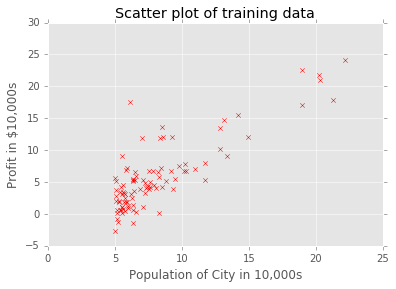

In [5]:
# Visualize the data (simple linear regression only!)
plt.scatter(X[:,1],y, c= 'red', marker = 'x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')
plt.show()

## 1.c. Gradient Descent: defining functions  

In [20]:
def computeCost(theta, X, y):
    J = np.sum((np.dot(X, theta) - y)**2)/(2*sampleSize)
    return J
    
def gradientDescent(theta, X, y, alpha, iterations):
    J_history = []
    for i in range(iterations):
        J_history += [computeCost(theta, X, y)]
        theta = theta - alpha / sampleSize * np.dot(X.T, (np.dot(X, theta) - y))
        #J_history += [computeCost(theta, X, y)]
    return theta, J_history

def gradientDescent2(theta, X, y, alpha, iterations):
    J_history = []
    for i in range(iterations):
        J_history += [computeCost(theta, X, y)]
        for j in range(numThetas):
            theta_temp = theta[j] - alpha / sampleSize * np.dot((np.dot(X, theta) - y), X[:,j].reshape(1,numThetas))
            theta[j] = theta_temp
    return theta, J_history
    
def selectLearningRate(X, y, alphas):
    iterations = 50
    for i in alphas:
        alpha = i
        cost = gradientDescent(theta, X, y, alpha, iterations)[1]
        #print(cost)
        plt.plot(range(iterations), cost, label = str(i))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Learning Rates (alpha)')
    plt.legend(loc = 'upper right', title = 'alpha')
    plt.show()

## 1.d. Initializing fitting parameters (thetas) and testing the cost function

In [7]:
# Initilize fitting parameters
theta = np.zeros((numThetas,1))
print(theta.shape)
print(theta[0][0])

# Test computeCost function. Expected output value: 32.07
round(computeCost(theta, X, y), 2) 

(2, 1)
0.0


32.07

## 1.e. Selecting the learning rate 'alpha'
 - To choose appropriate alpha one can try: 0.001, 0.003, 0.01, 0.03...and so on.<br>
 - Cost should decrease after very iteraton. If increases, probably the alpha is too big and GD diverges.

In this example alpha = 0.03 is already too big and causes divergence-problem.
We can see from the plot below that three different alphas we try demonstrate good results (quick convergence: finding the minimum of the cost function), whereas with alpha = 0.01 convergence is the quickest. 

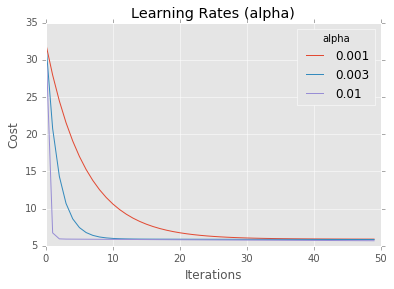

In [8]:
alphas = [0.001, 0.003, 0.01]
selectLearningRate(X, y, alphas)

## 1.f. Running GD and getting the regression parameters (thetas)

In [9]:
# Setting the alpha and number of iterations for GD
alpha = 0.01
iterations = 1500

In [21]:
thetaFit, J_history = gradientDescent2(theta, X, y, alpha, iterations)
#print('theta_initial_0 = ' + str(round(theta[0][0], 2)) 
#     + '\ntheta_initial_1 = ' + str(round(theta[1][0], 2)))
print('theta_0 = ' + str(round(thetaFit[0][0], 2)) 
    + '\ntheta_1 = ' + str(round(thetaFit[1][0], 2)))

ValueError: total size of new array must be unchanged

## 1.g. Visualization of the cost function and linear regression fit

In [65]:
def visualizeConvergence(iterations, J_history):
    '''
    Visualize how the convergence of cost function to its minimum 
    Takes in number of iterations and vector of cost function values for each 
    iteration (cost function history)
    '''
    #plt.plot(range(iterations), J_history)
    plt.plot(range(50), J_history[:50])
    plt.xlabel('Iterations')
    plt.ylabel('Cost J')
    plt.show()

def visualizeRegression():
    plt.scatter(X[:,1], y, c= 'red', marker = 'x')
    plt.plot(X[:,1], np.dot(X, thetaFit), color = 'blue')
    #plt.xlim(min(X[:,1]), max(X[:,1]))
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profits by population')
    plt.show()

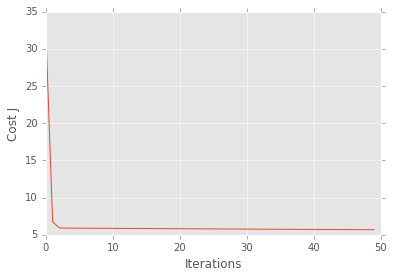

In [66]:
visualizeConvergence(iterations, J_history)

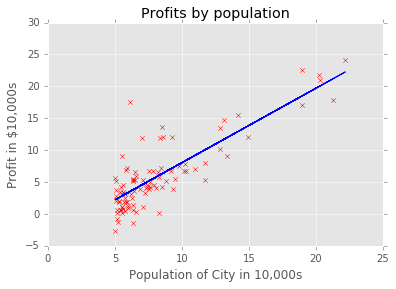

In [67]:
visualizeRegression()

## 1.h. Making predictions based on new thetas

In [14]:
point1 = np.array((1, 3.5)).reshape(1,2)
point2 = np.array((1, 7)).reshape(1,2)
predict1 = np.dot(point1,thetaFit)
predict2 = np.dot(point2,thetaFit)
print('Predicted profit for a city with population of ' +  str(point1[0][1]) + ' is ' + str(round(predict1[0][0], 2)))
print('Predicted profit for a city with population of ' +  str(point2[0][1]) + ' is ' + str(round(predict2[0][0], 2)))

Predicted profit for a city with population of 3.5 is 0.45
Predicted profit for a city with population of 7 is 4.53


# 2 Multiple linear regression

## 2.a. Splitting the data into dependent (X) and independent (y) variables

In [80]:
X = np.insert(data_2[:, :-1], 0, 1, axis = 1)
y = data_2[:, -1:]
sampleSize, numThetas = X.shape
print(X.shape)
print(y.shape)
print(np.round(X[:5, :], decimals = 2))
print(y[:5, :])

(47, 3)
(47, 1)
[[  1.00000000e+00   2.10400000e+03   3.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00]
 [  1.00000000e+00   1.41600000e+03   2.00000000e+00]
 [  1.00000000e+00   3.00000000e+03   4.00000000e+00]]
[[ 399900.]
 [ 329900.]
 [ 369000.]
 [ 232000.]
 [ 539900.]]


## 2.b. Feature normalization

In [81]:
def normalize(X):
    copy = X.copy()
    if X.shape[1] <= 1:    
        for i in range(X.shape[1]):
            copy[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    else:
        for i in range(1, X.shape[1]):
            copy[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])
    return copy

In [88]:
norm_X = normalize(X)
norm_y = normalize(y)

print(norm_X[:5,:])
print(norm_y[:5,:])


0
[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
[[ 0.48089023]
 [-0.08498338]
 [ 0.23109745]
 [-0.87639804]
 [ 1.61263744]]


## 2.c. Initializing fitting parameters (thetas) and testing the cost function

In [89]:
# Initilize fitting parameters
theta = np.zeros((numThetas,1))

# Checking the cost with the initial set of thetas
computeCost(theta, norm_X, norm_y)

0.5

## 2.d Selecting the learning rate alpha

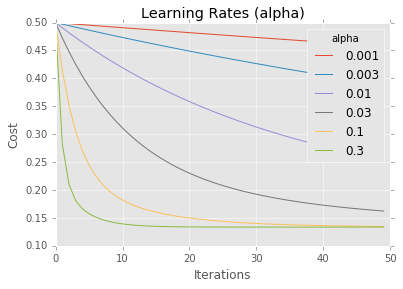

In [90]:
alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
selectLearningRate(norm_X, norm_y, alphas)

## 2.e. Running GD and getting the regression parameters (thetas)

In [91]:
# Setting the alpha and number of iterations for GD
alpha = 0.03
iterations = 1500

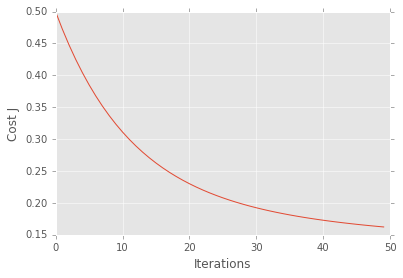

theta_0 = -0.0
theta_1 = 0.88
theta_2 = -0.05


In [98]:
# Running the GD and visualizing convergence
thetaFit, J_history = gradientDescent(theta, norm_X, norm_y, alpha, iterations)
visualizeConvergence(iterations, J_history)

print('theta_0 = ' + str(round(thetaFit[0][0], 2)) 
    + '\ntheta_1 = ' + str(round(thetaFit[1][0], 2))
    + '\ntheta_2 = ' + str(round(thetaFit[2][0], 2)))

## 2.f. Making predictions based on new thetas

In [94]:
# Prediction for an object with 1650 square feet and 3 rooms
# Normalization of features
size = (1650 - np.mean(X[:,1])) / np.std(X[:,1])
rooms = (3 - np.mean(X[:,2])) / np.std(X[:,2])
point = np.array((1, size, rooms)).reshape(1,3)
predict = np.dot(point, thetaFit)
print(predict)
      

[[-0.38262106]]


## Normal Equations

In [95]:
thetaFitNormal = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print(thetaFitNormal)

[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [100]:
# Prediction for an object with 1650 square feet and 3 rooms
predict = np.dot(point, thetaFitNormal)
print(predict)

[[ 91511.42364342]]
[[ 0.]
 [ 0.]
 [ 0.]]
